# Analysis of temperature and precipitation from Barcelona

In this workshop we will use Pandas to play with Temperature and Precipitation data from Barcelona (1780-2016). The goal of this workshop is to provide basic tricks to get started manipulating data using Pandas.

## Data sources:
– Prohom M, Barriendos M, Sanchez-Lorenzo A (2015): Reconstruction and homogenization of the longest instrumental precipitation series in the Iberian Peninsula (Barcelona, 1786-2014). International Journal of Climatology, DOI: 10.1002/joc.4537.
http://static-m.meteo.cat/wordpressweb/wp-content/uploads/2017/04/04113818/Barcelona_PPT_m_1786_2016.txt

– Prohom M, Barriendos, Aguilar E, Ripoll R (2012): Recuperación y análisis de la serie de temperatura diaria de Barcelona, 1780-2011. Cambio Climático. Extremos e Impactos, Asociación Española de Climatología, Serie A, Vol. 8, 207–217.
http://static-m.meteo.cat/wordpressweb/wp-content/uploads/2017/04/04113814/Barcelona_TM_m_1780_2016.txt

### Initial imports

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import numpy as np

### Read data

In [3]:
temperature_url = "http://static-m.meteo.cat/wordpressweb/wp-content/uploads/2017/04/04113814/Barcelona_TM_m_1780_2016.txt"
precipitation_url = "http://static-m.meteo.cat/wordpressweb/wp-content/uploads/2017/04/04113818/Barcelona_PPT_m_1786_2016.txt"

In [6]:
temperatures = pd.read_csv("Barcelona_TM_m_1780_2016.txt")
precipitation = pd.read_csv("Barcelona_PPT_m_1786_2016.txt")

## Let's see what happened

In [7]:
temperatures.head()

,1780 6.7 7.3 11.6 11.4 16.3 19.1 21.4 22 20.3 16.3 9.2 7.3
0,1781\t7.5\t8.9\t10.9\t13.7\t16.8\t18\t22\t22.6...
1,1782\t8.2\t6.1\t9.8\t10.5\t15.4\t20.1\t22.3\t2...
2,1783\t8.3\t8.6\t9.6\t12.4\t15\t19.1\t22.9\t21....
3,1784\t7.3\t7.1\t10.8\t10.7\t16.7\t20.7\t22\t20...
4,1785\t9\t6.4\t7.9\t11\t16\t20.3\t21\t21.7\t21....


## We loaded the data into pandas but it does not look good

Options to read [data](http://pandas.pydata.org/pandas-docs/version/0.19.1/api.html#input-output)

We use [pd.read_csv](http://pandas.pydata.org/pandas-docs/version/0.19.1/generated/pandas.read_csv.html). We can specify the delimiter to use (by default it uses ',').

In [9]:
temperatures = pd.read_csv("Barcelona_TM_m_1780_2016.txt", sep='\t')

In [10]:
temperatures.head()

,1780,6.7,7.3,11.6,11.4,16.3,19.1,21.4,22,20.3,16.3.1,9.2,7.3.1
0,1781,7.5,8.9,10.9,13.7,16.8,18.0,22.0,22.6,19.1,15.0,11.8,10.3
1,1782,8.2,6.1,9.8,10.5,15.4,20.1,22.3,22.6,19.9,13.8,7.4,7.5
2,1783,8.3,8.6,9.6,12.4,15.0,19.1,22.9,21.4,18.6,15.5,11.0,10.4
3,1784,7.3,7.1,10.8,10.7,16.7,20.7,22.0,20.5,20.0,13.8,8.5,5.3
4,1785,9.0,6.4,7.9,11.0,16.0,20.3,21.0,21.7,21.6,16.8,10.3,7.9


### This looks better but we still need to improve

Pandas uses the first row of a csv file as the header. Since our data file does not contain a header with column names, we need to tell Pandas about it *(header=None)*.

We know that data comes in the following format:
- 13 columns: one for the year number and 12 for the monthly average temperature values [ºC]

We can create a list of column names to be used when reading the data.

In [11]:
temperature_url = "Barcelona_TM_m_1780_2016.txt"
cols = ['year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
temperatures = pd.read_csv(temperature_url, sep='\t', header=None, names=cols, index_col=0)
temperatures.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1780,6.7,7.3,11.6,11.4,16.3,19.1,21.4,22.0,20.3,16.3,9.2,7.3
1781,7.5,8.9,10.9,13.7,16.8,18.0,22.0,22.6,19.1,15.0,11.8,10.3
1782,8.2,6.1,9.8,10.5,15.4,20.1,22.3,22.6,19.9,13.8,7.4,7.5
1783,8.3,8.6,9.6,12.4,15.0,19.1,22.9,21.4,18.6,15.5,11.0,10.4
1784,7.3,7.1,10.8,10.7,16.7,20.7,22.0,20.5,20.0,13.8,8.5,5.3


### What have we done?

Now the dataframe is indexed by year and it contains 12 columns with the name of the month for which they provide the temperature values.
Working with this dataframe is much more comfortable. We can slice the data by year/month.

## Exercise

Load the precipitation data set and print the first 5 rows of the resulting dataframe

In [14]:
precipitation_url = "Barcelona_PPT_m_1786_2016.txt"
precipitation = pd.read_csv(precipitation_url, sep='\t', names=cols, index_col=0)
precipitation.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1786,32.8,28.4,84.4,42.3,8.5,38.0,6.8,52.1,62.0,57.0,195.8,114.1
1787,136.4,27.4,44.6,76.9,0.0,29.8,34.7,14.9,205.8,12.4,42.2,0.0
1788,9.9,14.9,32.2,12.4,7.5,146.3,59.4,29.8,123.9,163.6,106.6,22.3
1789,12.4,12.4,23.6,9.9,32.2,9.9,6.3,69.4,18.7,52.1,18.7,76.9
1790,44.6,1.2,188.5,74.4,44.7,39.7,65.7,32.3,71.9,205.8,72.0,14.9


### Let's observe this DataFrame

A useful pandas DataFrame method is [df.describe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [15]:
temperatures.describe(include='all')

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,7.640084,8.524895,10.259072,12.428692,15.876371,19.558228,22.443038,22.571308,19.785654,15.782278,11.146414,8.301266
std,1.482510,1.581223,1.383641,1.237077,1.441762,1.572777,1.519368,1.340764,1.350818,1.386719,1.387611,1.426846
min,3.400000,2.500000,6.100000,9.400000,11.500000,15.700000,18.400000,18.800000,16.000000,11.000000,7.300000,4.400000
25%,6.700000,7.700000,9.500000,11.500000,14.900000,18.500000,21.400000,21.600000,18.800000,14.800000,10.300000,7.300000
50%,7.700000,8.600000,10.200000,12.400000,15.800000,19.500000,22.400000,22.400000,19.800000,15.800000,11.200000,8.300000
75%,8.800000,9.500000,11.100000,13.300000,16.800000,20.600000,23.400000,23.400000,20.800000,16.700000,12.000000,9.300000
max,10.700000,12.500000,14.800000,15.900000,19.100000,25.600000,27.100000,28.500000,23.900000,19.600000,14.600000,12.600000


## Exercise

When does it rain more in Barcelona? Use "describe" to get this information for all months.

In [17]:
precipitation.describe(include='all')

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,38.089177,34.823377,48.448052,52.914286,54.145022,37.380952,26.099134,39.617316,79.387013,78.660606,58.035498,43.391775
std,38.789554,36.127198,37.671483,34.793821,40.607655,32.564899,28.099448,35.083219,56.299727,59.048356,51.052552,45.205136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000,0.500000,0.000000,0.000000
25%,10.750000,11.000000,21.650000,25.300000,26.300000,13.100000,4.800000,11.900000,36.350000,38.300000,21.200000,13.500000
50%,27.400000,25.500000,38.800000,45.700000,45.300000,32.500000,16.400000,30.900000,68.600000,64.000000,44.600000,31.200000
75%,52.050000,46.850000,69.400000,76.600000,72.750000,51.150000,38.300000,59.000000,104.750000,103.600000,78.750000,56.400000
max,262.400000,275.100000,188.500000,185.700000,235.100000,183.300000,163.200000,196.200000,338.500000,328.600000,330.400000,365.800000


### Transpose

At some point of our data exploration we might need to transpose the DataFrame.

In [18]:
temperatures.T

year,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Jan,6.7,7.5,8.2,8.3,7.3,9.0,7.8,5.4,6.4,6.9,...,9.9,10.1,7.2,6.6,8.4,9.4,9.1,9.8,9.1,10.7
Feb,7.3,8.9,6.1,8.6,7.1,6.4,8.3,7.8,10.1,9.3,...,11.4,10.2,8.7,8.0,10.0,6.8,7.7,10.1,8.2,11.3
Mar,11.6,10.9,9.8,9.6,10.8,7.9,9.9,11.3,10.4,8.7,...,12.1,10.8,11.2,9.6,10.9,13.4,11.2,12.3,12.0,11.1
Apr,11.4,13.7,10.5,12.4,10.7,11.0,12.8,12.1,12.5,13.3,...,15.0,13.7,13.1,14.1,15.9,12.6,13.5,15.3,14.8,13.6
May,16.3,16.8,15.4,15.0,16.7,16.0,16.8,14.7,17.1,17.7,...,17.9,16.6,18.8,15.4,18.3,17.9,14.6,16.2,19.1,16.4
Jun,19.1,18.0,20.1,19.1,20.7,20.3,20.2,19.2,19.2,18.5,...,22.0,20.7,23.0,20.3,19.5,22.3,19.5,21.7,23.2,21.6
Jul,21.4,22.0,22.3,22.9,22.0,21.0,20.9,21.0,22.1,20.9,...,23.6,23.8,24.4,25.7,21.2,23.2,25.6,22.6,26.0,24.9
Aug,22.0,22.6,22.6,21.4,20.5,21.7,21.1,21.8,23.0,21.9,...,22.5,24.3,26.3,24.3,24.1,26.0,24.9,23.0,23.5,24.5
Sep,20.3,19.1,19.9,18.6,20.0,21.6,19.5,19.4,19.1,20.0,...,20.6,20.7,21.5,20.9,22.9,21.4,22.0,22.0,19.7,22.3
Oct,16.3,15.0,13.8,15.5,13.8,16.8,15.5,15.5,15.5,14.7,...,16.4,16.5,17.9,16.2,19.1,17.3,19.5,19.6,16.7,17.1


In [19]:
temperatures.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1780,6.7,7.3,11.6,11.4,16.3,19.1,21.4,22.0,20.3,16.3,9.2,7.3
1781,7.5,8.9,10.9,13.7,16.8,18.0,22.0,22.6,19.1,15.0,11.8,10.3
1782,8.2,6.1,9.8,10.5,15.4,20.1,22.3,22.6,19.9,13.8,7.4,7.5
1783,8.3,8.6,9.6,12.4,15.0,19.1,22.9,21.4,18.6,15.5,11.0,10.4
1784,7.3,7.1,10.8,10.7,16.7,20.7,22.0,20.5,20.0,13.8,8.5,5.3


### Selecting a range of years

[Information about Indexing and Slicing](http://pandas.pydata.org/pandas-docs/version/0.19.1/indexing.html)

In [20]:
temperatures.loc[1980:1990]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1980,7.3,10.1,10.7,11.3,14.5,17.7,20.5,23.2,21.1,15.9,10.4,6.9
1981,7.2,7.2,13.0,12.7,15.2,20.9,21.2,23.1,20.6,16.8,12.8,9.8
1982,10.4,9.2,9.7,12.8,15.6,20.6,24.5,20.9,20.3,16.0,12.0,9.1
1983,9.1,6.4,10.8,13.4,16.1,20.8,25.8,22.2,21.5,17.4,12.8,9.8
1984,8.3,7.6,9.0,12.7,13.5,19.4,23.9,22.3,19.2,15.8,13.0,8.7
1985,4.3,10.7,9.5,14.0,14.7,19.3,24.8,22.6,22.8,17.6,9.7,9.6
1986,7.4,7.3,10.8,10.8,18.4,20.4,23.7,23.7,21.4,17.4,12.8,9.0
1987,6.9,8.0,9.8,13.8,15.1,19.6,23.7,24.3,23.9,16.9,11.2,10.8
1988,9.5,8.6,11.2,13.1,16.3,19.8,23.7,24.3,21.2,17.8,11.8,8.8


### Selection of a column

In [21]:
temperatures.Jan.head()

year
1780    6.7
1781    7.5
1782    8.2
1783    8.3
1784    7.3
Name: Jan, dtype: float64

In [22]:
temperatures['Jan'].head()

year
1780    6.7
1781    7.5
1782    8.2
1783    8.3
1784    7.3
Name: Jan, dtype: float64

In [23]:
temperatures.Feb.equals(temperatures['Feb'])

True

### Slicing by year and months

In [24]:
temperatures.loc[1990:1999, ['Jan', 'Feb', 'Mar']]

,Jan,Feb,Mar
year,,,
1990,9.0,12.5,12.6
1991,8.1,8.0,11.8
1992,7.1,8.9,11.0
1993,9.0,8.2,10.2
1994,8.4,9.5,13.1
1995,8.6,11.5,10.9
1996,10.2,7.7,9.9
1997,8.7,11.4,13.9
1998,8.8,11.0,12.2


### Selection by Callable

.loc, .iloc, .ix and also [] indexing can accept a callable as indexer. The callable must be a function with one argument (the calling Series, DataFrame or Panel) and that returns valid output for indexing.

In [25]:
temperatures.loc[lambda df: df.index % 10 == 0].head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1780,6.7,7.3,11.6,11.4,16.3,19.1,21.4,22.0,20.3,16.3,9.2,7.3
1790,7.4,9.5,10.4,12.3,15.0,19.0,20.8,23.1,19.3,17.1,11.7,7.9
1800,7.5,8.9,9.1,13.3,16.4,17.9,23.2,22.3,18.8,14.5,10.1,8.2
1810,5.6,5.8,11.0,10.9,14.7,17.1,20.5,20.9,18.1,15.5,10.7,8.1
1820,6.6,8.1,7.9,12.8,16.1,17.5,21.8,22.7,17.7,13.7,9.3,7.7


In [40]:
temperatures.loc[1990:1999][lambda s: s < 15].dropna(axis=1, how='any')

,Jan,Feb,Mar,Apr,Nov,Dec
year,,,,,,
1990,9.0,12.5,12.6,12.3,10.9,6.7
1991,8.1,8.0,11.8,11.5,10.9,8.5
1992,7.1,8.9,11.0,13.7,13.4,9.2
1993,9.0,8.2,10.2,12.8,10.5,9.3
1994,8.4,9.5,13.1,12.3,14.0,9.7
1995,8.6,11.5,10.9,14.0,12.9,10.1
1996,10.2,7.7,9.9,13.2,11.4,9.7
1997,8.7,11.4,13.9,14.1,12.6,9.3
1998,8.8,11.0,12.2,12.7,10.8,8.7


## Exercise

Print the precipitation values from June to August in the 1990's.

In [38]:
precipitation.loc[1990:2000][['Jun', 'Jul', 'Aug']]

,Jun,Jul,Aug
year,,,
1990,45.9,8.0,26.6
1991,5.6,4.8,67.3
1992,162.3,61.4,45.4
1993,8.4,21.6,59.1
1994,44.6,0.3,4.9
1995,30.3,4.8,68.7
1996,89.2,1.0,43.4
1997,60.7,26.3,24.9
1998,9.6,4.1,49.8


## Plotting a DataFrame

Pandas makes very easy to plot the data of a DataFrame ([df.plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)).

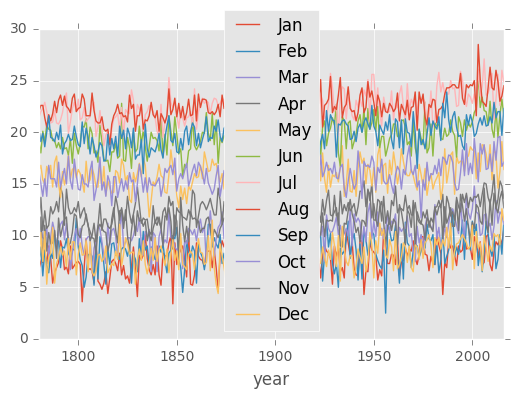

In [41]:
temperatures.plot()

In this case it is difficult to make sense of the resulting plot. Let's slice the DataFrame to obtain a plot we can understand.

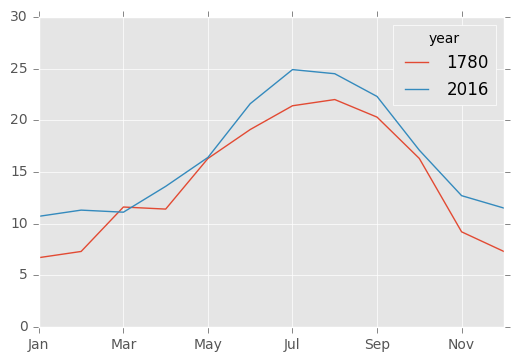

In [42]:
temperatures.T[[1780, 2016]].plot(ylim=(0, 30))

We have selected temperatures from 1780 and 2016. Temperatures follow the seasonal cycle. We observe that 2016 temperatures are higher than 1780. Is this a trend or it is just the result of the sampling of data?

Let's observe the evolution of the temperature of the first three months of the year in this period of time.

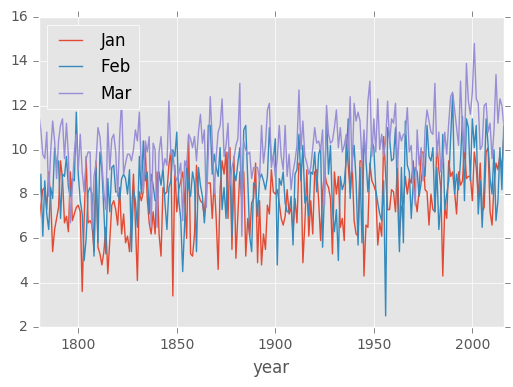

In [43]:
temperatures[['Jan', 'Feb', 'Mar']].plot()

Data is too noisy to make any sense out of it. Let's see what happens if we use a [rolling window average](http://pandas.pydata.org/pandas-docs/version/0.19.1/generated/pandas.DataFrame.rolling.html):

In [44]:
rolling_temp = temperatures.rolling(window=20)
type(rolling_temp)

pandas.core.window.Rolling

In [45]:
rolling_avg_temp = rolling_temp.mean()

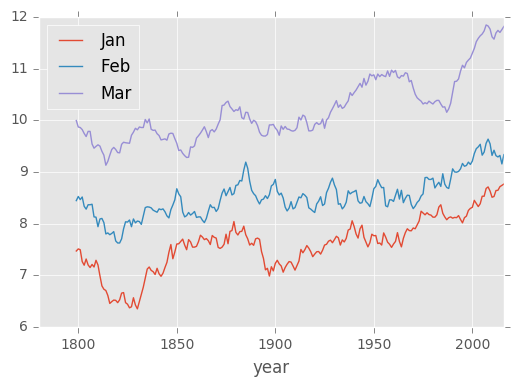

In [46]:
rolling_avg_temp[['Jan', 'Feb', 'Mar']].plot()

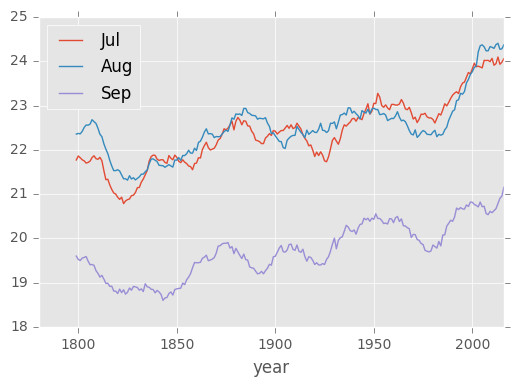

In [47]:
rolling_avg_temp[['Jul', 'Aug', 'Sep']].plot()

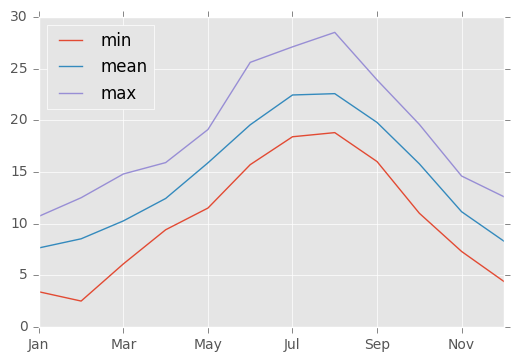

In [48]:
temperatures.describe(include='all').T[['min', 'mean', 'max']].plot()

## Exercise

Plot the yearly mean of precipitation values to observe their behaviour.

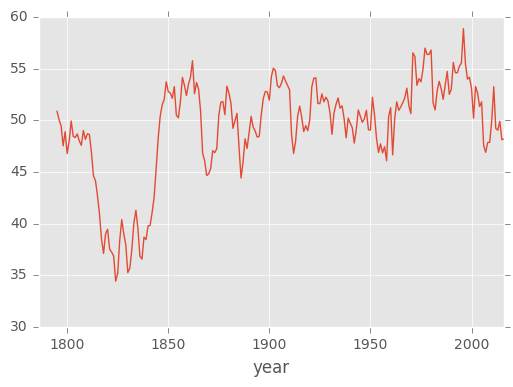

In [58]:
precipitation.T.mean().rolling(10).mean().plot()

### Using DatetimeIndex

We will now use a DatetimeIndex and we will use it to [resample](http://pandas.pydata.org/pandas-docs/version/0.19.0/generated/pandas.DataFrame.resample.html) the data. Resample allows us to automatically group data by periods of time.

In [59]:
# Create a copy of the temperatures DataFrame
date_temp = temperatures.copy()

Pandas has a function to convert an argument to a datetime.

In [60]:
date_temp.index = pd.to_datetime(date_temp.index, format='%Y')

In [61]:
date_temp.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1780-01-01,6.7,7.3,11.6,11.4,16.3,19.1,21.4,22.0,20.3,16.3,9.2,7.3
1781-01-01,7.5,8.9,10.9,13.7,16.8,18.0,22.0,22.6,19.1,15.0,11.8,10.3
1782-01-01,8.2,6.1,9.8,10.5,15.4,20.1,22.3,22.6,19.9,13.8,7.4,7.5
1783-01-01,8.3,8.6,9.6,12.4,15.0,19.1,22.9,21.4,18.6,15.5,11.0,10.4
1784-01-01,7.3,7.1,10.8,10.7,16.7,20.7,22.0,20.5,20.0,13.8,8.5,5.3


Now that we have the DatetimeIndex, we can resample data.

In [63]:
temps_50 = date_temp.loc['1800':'2017'].resample('50AS')
type(temps_50)

pandas.tseries.resample.DatetimeIndexResampler

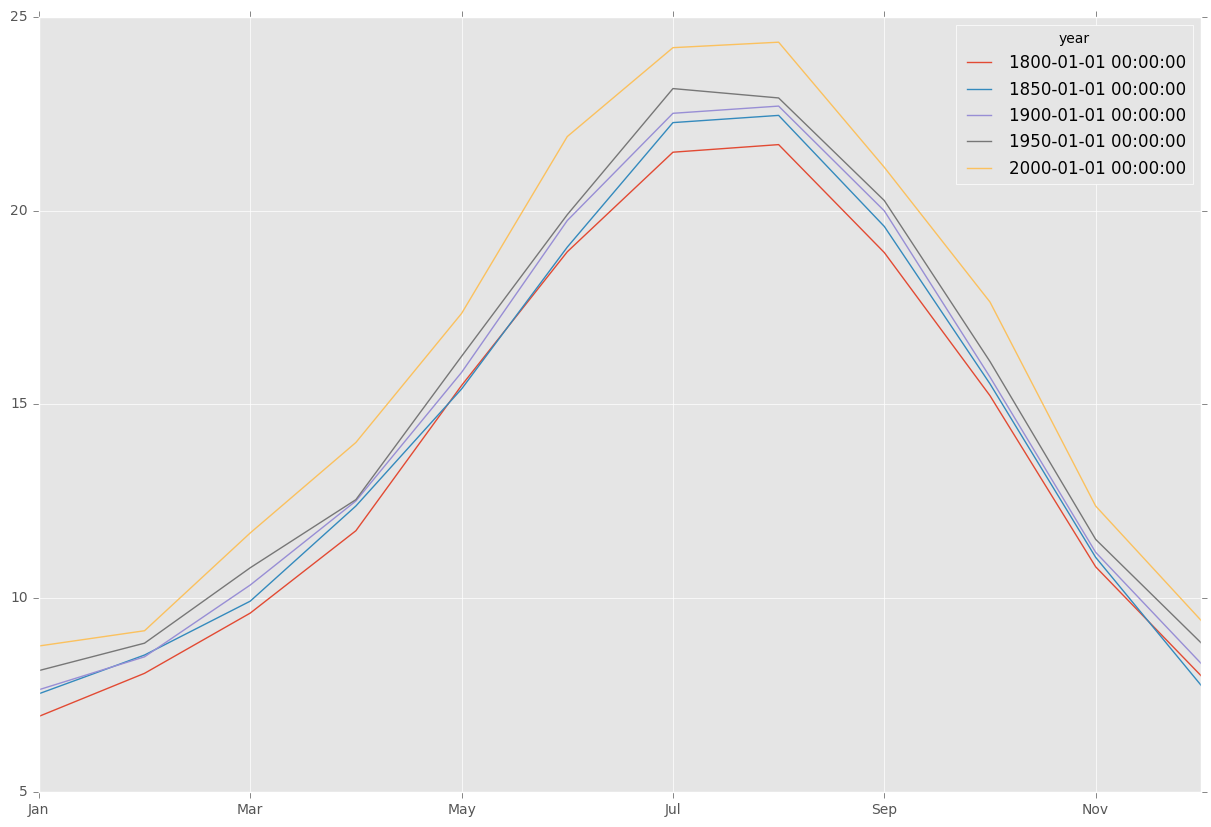

In [64]:
temps_50.mean().T.plot(figsize=(15, 10))

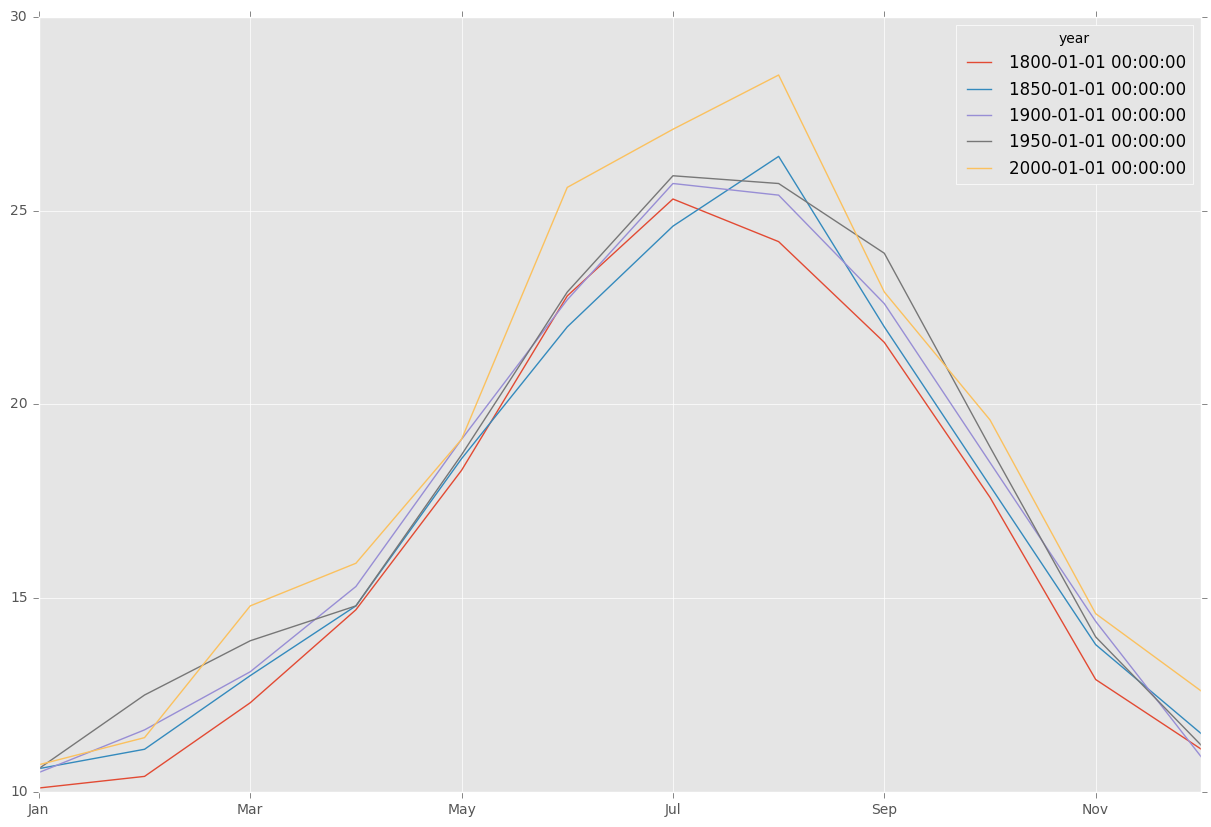

In [65]:
temps_50.max().T.plot(figsize=(15, 10))

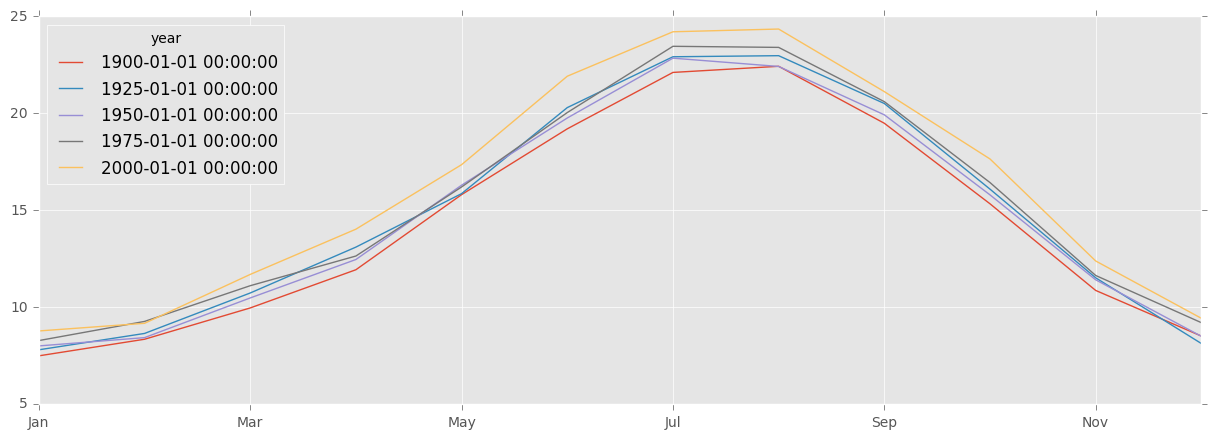

In [66]:
date_temp.loc['1900':'2017'].resample('25AS').mean().T.plot(figsize=(15, 5))

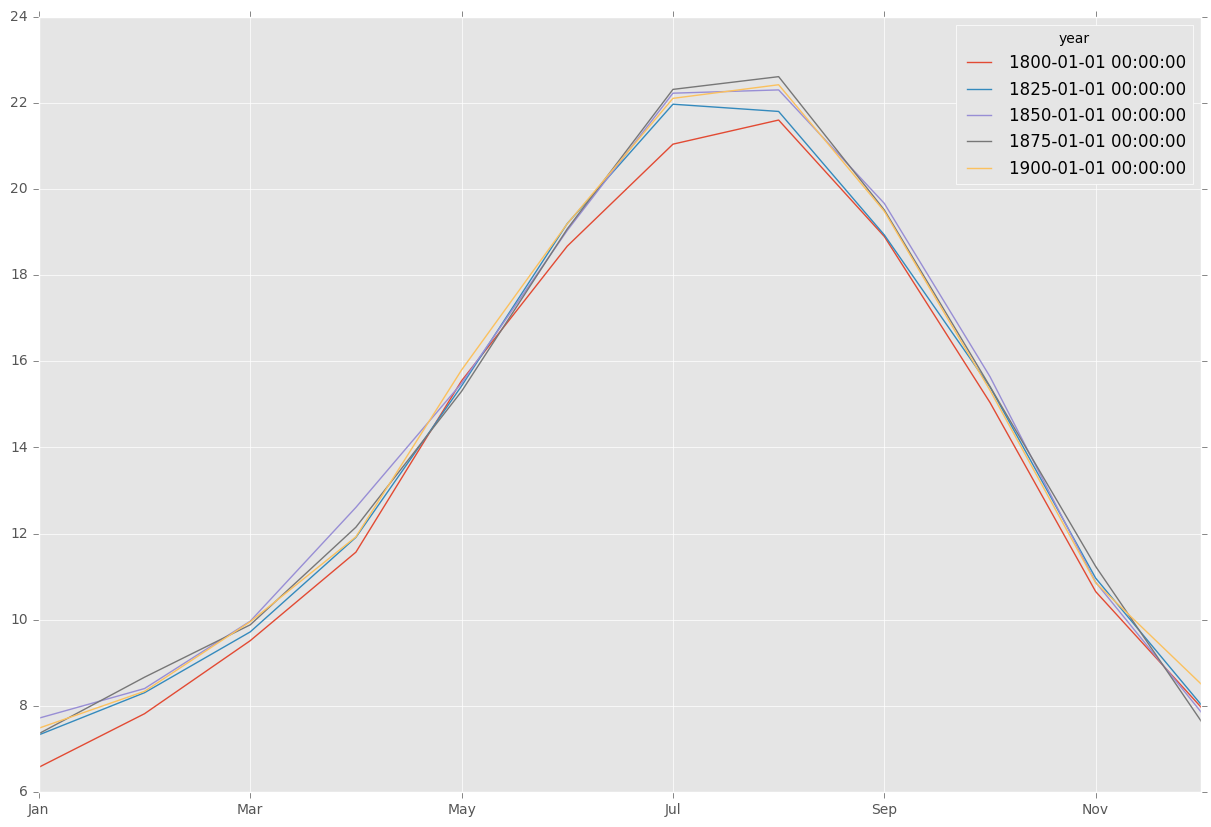

In [67]:
date_temp.loc['1800':'1924'].resample('25AS').mean().T.plot(figsize=(15, 10))

## Exercise

Create a precipitation DF with a DatetimeIndex and resample it every 10 years.

In [69]:
# Create a copy of the precipitation DF and change the index to a DatetimeIndex
date_prec = precipitation.copy()
date_prec.index = pd.to_datetime(date_prec.index, format='%Y')
date_prec.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1786-01-01,32.8,28.4,84.4,42.3,8.5,38.0,6.8,52.1,62.0,57.0,195.8,114.1
1787-01-01,136.4,27.4,44.6,76.9,0.0,29.8,34.7,14.9,205.8,12.4,42.2,0.0
1788-01-01,9.9,14.9,32.2,12.4,7.5,146.3,59.4,29.8,123.9,163.6,106.6,22.3
1789-01-01,12.4,12.4,23.6,9.9,32.2,9.9,6.3,69.4,18.7,52.1,18.7,76.9
1790-01-01,44.6,1.2,188.5,74.4,44.7,39.7,65.7,32.3,71.9,205.8,72.0,14.9


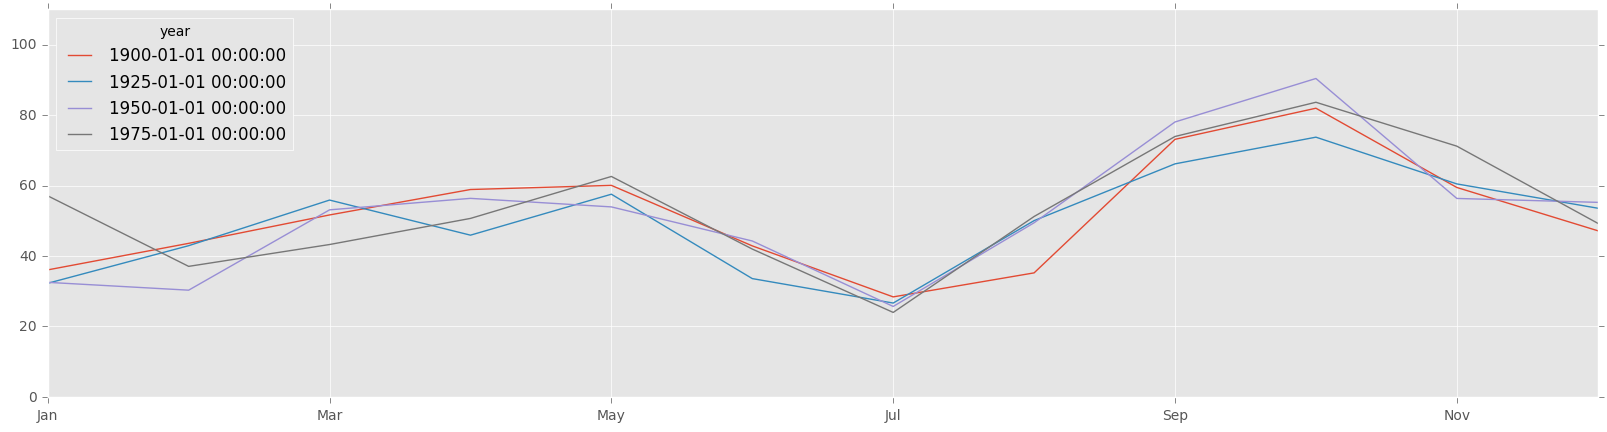

In [83]:
# Plot the monthly average precipitation data resampled every 25 years for the period 1900-1999
date_prec.loc['1900':'1999'].resample('25AS').mean().T.plot(figsize=(20, 5), ylim=(0, 110))

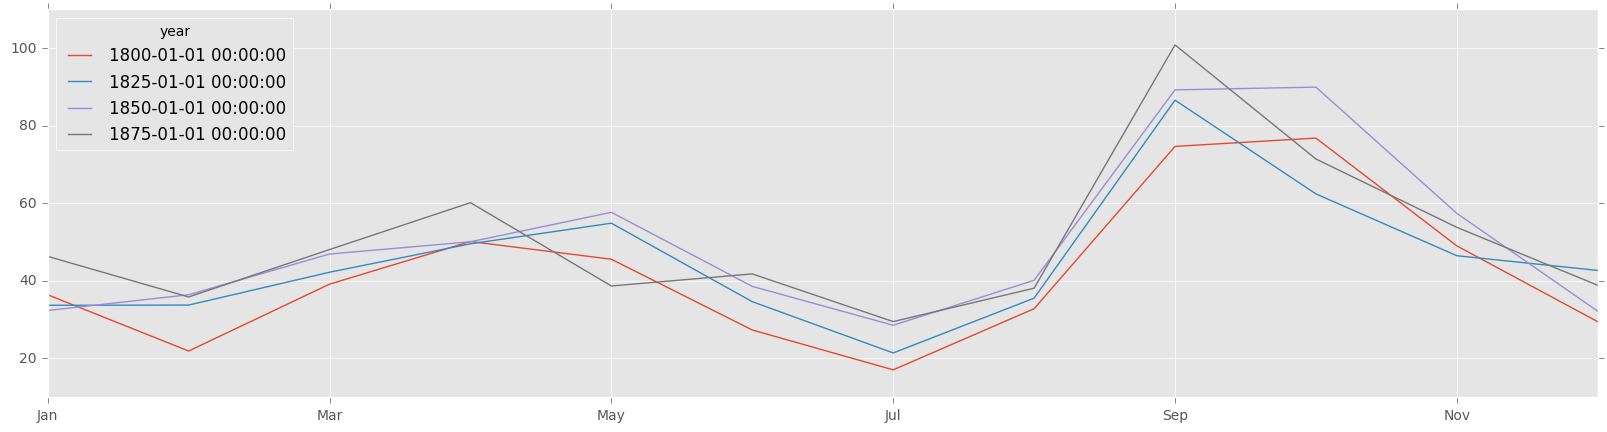

In [84]:
# Plot the monthly average precipitation data resampled every 25 years for the period 1800-1899
date_prec.loc['1800':'1899'].resample('25AS').mean().T.plot(figsize=(20, 5))

# Reshaping the DataFrame

### MultiIndex / Advanced Indexing

[Reference information](http://pandas.pydata.org/pandas-docs/version/0.19.1/advanced.html)

In [85]:
temperatures_bis = pd.read_csv(temperature_url, sep='\t', header=None, names=cols, index_col=0)
temperatures_bis.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1780,6.7,7.3,11.6,11.4,16.3,19.1,21.4,22.0,20.3,16.3,9.2,7.3
1781,7.5,8.9,10.9,13.7,16.8,18.0,22.0,22.6,19.1,15.0,11.8,10.3
1782,8.2,6.1,9.8,10.5,15.4,20.1,22.3,22.6,19.9,13.8,7.4,7.5
1783,8.3,8.6,9.6,12.4,15.0,19.1,22.9,21.4,18.6,15.5,11.0,10.4
1784,7.3,7.1,10.8,10.7,16.7,20.7,22.0,20.5,20.0,13.8,8.5,5.3


In [86]:
"""Creates a DataFrame with a MultiIndex with two levels corresponding to the year and month."""
def create_multiindex_df(year, temperature_values):
    idx = pd.MultiIndex(levels=[[year], cols[1:]], names=['Year', 'Month'], labels = [np.zeros(12), range(0, 12)])
    df = pd.DataFrame(temperature_values, index=idx)
    df.columns = ["Temperature"]
    return df

With this function to create a yearly MultiIndex DataFrame we can transform the temperatures DF into a multiindex DF. We append all the yearly DF to obtain a single DF.

In [87]:
df = pd.DataFrame()
for y in temperatures_bis.index:
    df = df.append(create_multiindex_df(y, temperatures_bis.loc[y].values))

In [94]:
df.head()

Temperature
Year Month             
1780 Jan            6.7
     Feb            7.3
     Mar           11.6
     Apr           11.4
     May           16.3

Now we can plot all the data as a TimeSeries.

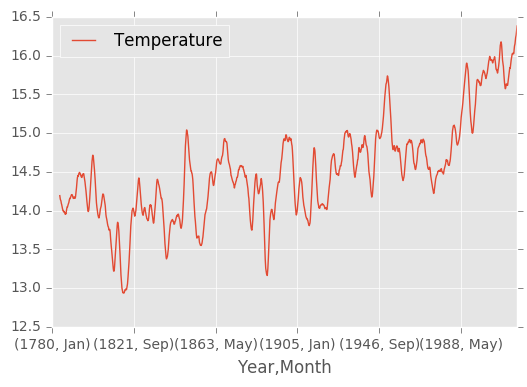

In [92]:
df.rolling(window=48, win_type='triang').mean().plot()

## Exercise

Make the same modification to the precipitation dataset. Once you have it we will join both DataFrames.

In [93]:
# Create a copy of the precipitation DF
precipitation_bis = precipitation.copy()

In [106]:
# Create a function to make the yearly multiindex DF

def create_multiindex_precipitation_df(year, precipitation_values):
    idx = pd.MultiIndex(levels=[[year], cols[1:]], names=['Year', 'Month'], labels = [np.zeros(12), range(0, 12)])
    df_tmp = pd.DataFrame(precipitation_values, index=idx)
    df_tmp.columns = ["Precipitation"]
    return df_tmp


In [107]:
# Create the DF with the data from all years
df_prec = pd.DataFrame()
for y in precipitation_bis.index:
    df_prec = df_prec.append(create_multiindex_precipitation_df(y, precipitation_bis.loc[y].values))

df_prec.

Precipitation
Year Month               
1786 Jan             32.8
     Feb             28.4
     Mar             84.4
     Apr             42.3
     May              8.5
     Jun             38.0
     Jul              6.8
     Aug             52.1
     Sep             62.0
     Oct             57.0
     Nov            195.8
     Dec            114.1
1787 Jan            136.4
     Feb             27.4
     Mar             44.6
     Apr             76.9
     May              0.0
     Jun             29.8
     Jul             34.7
     Aug             14.9
     Sep            205.8
     Oct             12.4
     Nov             42.2
     Dec              0.0
1788 Jan              9.9
     Feb             14.9
     Mar             32.2
     Apr             12.4
     May              7.5
     Jun            146.3

In [110]:
# Join Temperature and Precipitation DataFrames
final_df = df.join(df_prec)

In [117]:
final_df.T

Year          1780                                                       ...   \
Month          Jan  Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct  ...    
Temperature    6.7  7.3  11.6  11.4  16.3  19.1  21.4  22.0  20.3  16.3  ...    
Precipitation  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    

Year           2016                                                        
Month           Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  
Temperature    11.1  13.6  16.4  21.6  24.9  24.5  22.3  17.1  12.7  11.5  
Precipitation  44.2  68.1  28.7  19.4  16.9  17.6  95.7  75.8  38.5  34.3  

[2 rows x 2844 columns]